Баранов Д.А. ИВТ 2.1
Лабораторная работа №2. DecisionTree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, model_selection, metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
voice_data = pd.read_csv('/content/voice_gender.csv')
print(voice_data.head())
print("Пропущенные значения:", voice_data.isnull().sum().sum())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402905  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

In [3]:
# Подготовка признаков
X = voice_data.drop('label', axis = 1)
y = voice_data['label']

# Разделение
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42
)
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (2534, 20), Test shape: (634, 20)


Задание 1. Решающие пни (max_depth = 1)

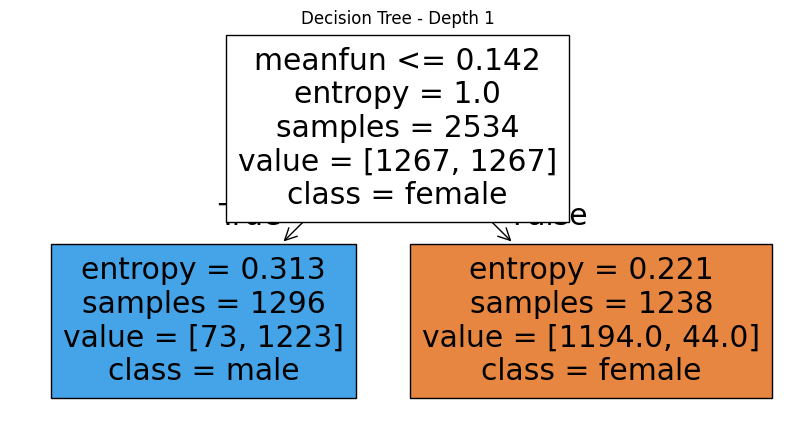

Признак в корне: meanfun
Пороговое значение: 0.142
Процент в обучающей выборке (левое правило):  51.1
Accuracy (depth = 1): 0.956


In [4]:
dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 42)
dt1.fit(X_train, y_train)
plt.figure(figsize = (10, 5))
plot_tree(dt1, feature_names = X.columns, class_names = dt1.classes_, filled = True)
plt.title("Decision Tree - Depth 1")
plt.show()

# Вопросы к заданию 1
print("Признак в корне:", X.columns[dt1.tree_.feature[0]])
print("Пороговое значение:", round(dt1.tree_.threshold[0], 3))
samples_left = dt1.tree_.n_node_samples[1]
total = X_train.shape[0]
print("Процент в обучающей выборке (левое правило): ", round(samples_left / total * 100, 1))
y_pred1 = dt1.predict(X_test)
acc1 = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy (depth = 1):", round(acc1, 3))

Задание 2: Дерево глубины 2

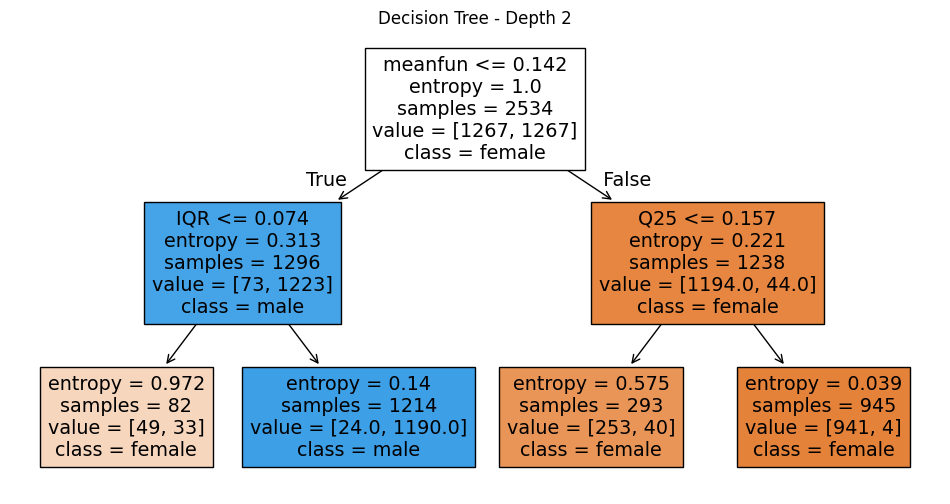

Используемые признаки (глубина 2): {'Q25', 'IQR', 'meanfun'}
Число листьев, предсказывающих female: 82
Accuracy (depth = 2): 0.962


In [5]:
dt2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 42)
dt2.fit(X_train, y_train)
plt.figure(figsize = (12, 6))
plot_tree(dt2, feature_names = X.columns, class_names = dt2.classes_, filled = True)
plt.title("Decision Tree - Depth 2")
plt.show()

print("Используемые признаки (глубина 2):", set(X.columns[dt2.tree_.feature[dt2.tree_.feature >= 0]]))
print("Число листьев, предсказывающих female:", list(dt2.apply(X_train)).count(2))
y_pred2 = dt2.predict(X_test)
acc2 = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy (depth = 2):", round(acc2, 3))

Задание 3: Без ограничения глубины

In [7]:
dt3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt3.fit(X_train, y_train)
print("Глубина деерева:", dt3.get_depth())
print("Количество листьев:", dt3.get_n_leaves())
acc_train3 = metrics.accuracy_score(y_train, dt3.predict(X_train))
acc_test3 = metrics.accuracy_score(y_test, dt3.predict(X_test))
print("Accuracy (train):", round(acc_train3, 3))
print("Accuracy (test):", round(acc_test3, 3))

Глубина деерева: 12
Количество листьев: 54
Accuracy (train): 1.0
Accuracy (test): 0.973


Задание 4: GridSearchCV

In [9]:
param_grid = {
    'criterion': ['gini', 'entropy'], # критерий информативности
    'max_depth': list(range(4, 11)), # максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] # минимальное количетсво объектов, необходимое для сплита
}
cv = StratifiedKFold(n_splits = 5)
grid = GridSearchCV(
    DecisionTreeClassifier(random_state = 0),
    param_grid,
    scoring = 'accuracy',
    cv = cv
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Лучший критерий:", grid.best_params_['criterion'])
print("Оптимальная глубина:", grid.best_params_['max_depth'])
print("Оптимальный min_samples_split:", grid.best_params_['min_samples_split'])

acc_train_best = metrics.accuracy_score(y_train, best_model.predict(X_train))
acc_test_best = metrics.accuracy_score(y_test, best_model.predict(X_test))
print("Accuracy (train, best model):", round(acc_train_best, 3))
print("Accuracy (test, best model):", round(acc_test_best, 3))

Лучший критерий: gini
Оптимальная глубина: 7
Оптимальный min_samples_split: 3
Accuracy (train, best model): 0.996
Accuracy (test, best model): 0.97


Задание 5: Важность признаков

Топ-3 признака:
 meanfun    0.861347
IQR        0.056810
sfm        0.018004
dtype: float64


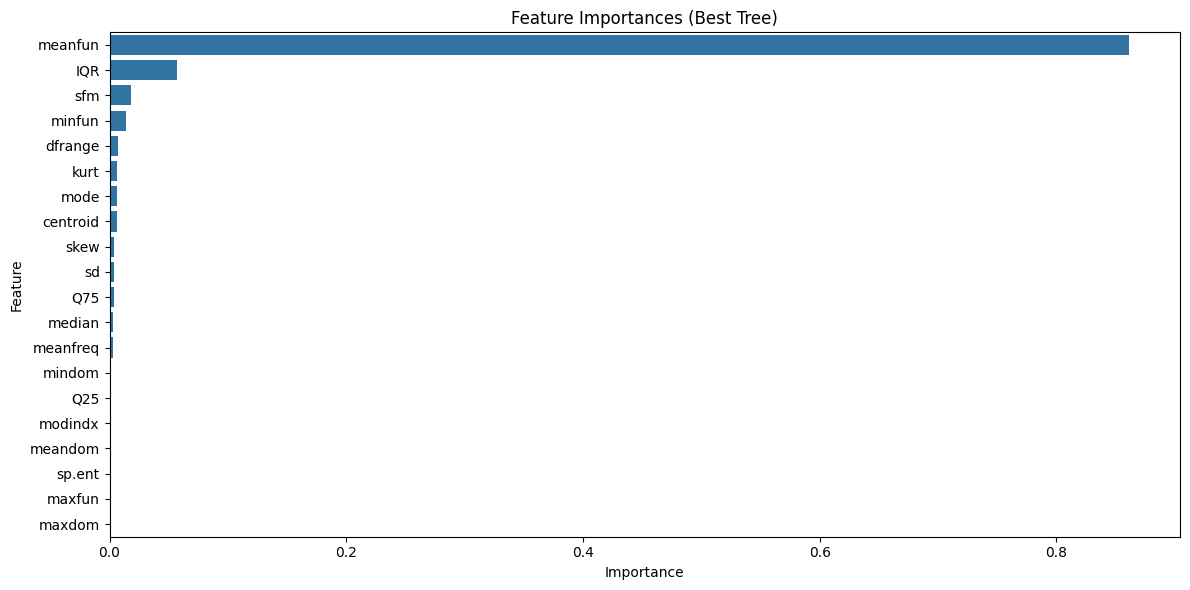

In [11]:
importances = best_model.feature_importances_
importance_df = pd.Series(importances, index = X.columns).sort_values(ascending = False)
print("Топ-3 признака:\n", importance_df.head(3))

# Визуализация
plt.figure(figsize = (12, 6))
sns.barplot(x = importance_df.values, y = importance_df.index)
plt.title('Feature Importances (Best Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()